#### Madeline Fontana
#### INFSCI 1520 Information Visualization
#### Midterm Report

For my midterm report, I have chosen to investigate public transit usage in Pittsburgh by looking at data from Pittsburgh Regional Transit. The dataset I have chosen is titled Monthy_Updating_Bus_Stop_Usage and is sourced from the Western Pennsylvania Regional Data Center. Information about this dataset can be found here [Pittsburgh Regional Transit Bus Stop Usage](https://data.wprdc.org/dataset/prt-transit-stop-usage). For my visualization, I will be analyzing ridership by looking at how many people are getting on and off at any given stop.

---

**Prepare for analysis and visualization**

In [700]:
# import any necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [650]:
# read in the dataset and take a look at it
prt_df = pd.read_csv('wprdc_stop_data.csv')
prt_df.head()

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,datekey,time_period,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs
0,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Sat,12.0,0.0,4,3.000000,0.00
1,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Sun,14.0,0.0,6,2.333333,0.00
2,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Weekday,64.0,1.0,20,3.200000,0.05
3,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,P69,Weekday,39.0,0.0,20,1.950000,0.00
4,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,69,Sat,11.0,0.0,4,2.750000,0.00


In [652]:
# check the data types for each column
prt_df.dtypes

clever_id        int64
stop_id         object
stop_name       object
direction       object
routes_ser      object
latitude       float64
longitude      float64
mode            object
shelter         object
stop_type       object
datekey          int64
time_period     object
route_name      object
serviceday      object
total_ons      float64
total_offs     float64
days             int64
avg_ons        float64
avg_offs       float64
dtype: object

In [654]:
# check the dimensions of the dataset
prt_df.shape

(107611, 19)

---

**Deal with missing values**

In [658]:
prt_df.isnull().sum()

clever_id        0
stop_id          0
stop_name        0
direction        0
routes_ser       0
latitude         0
longitude        0
mode            15
shelter         15
stop_type       15
datekey          0
time_period      0
route_name       0
serviceday       0
total_ons      206
total_offs     207
days             0
avg_ons        206
avg_offs       207
dtype: int64

In [660]:
# remove nulls in the dataset
prt_df.dropna(inplace=True)
prt_df.shape

(107389, 19)

---

**Check for outliers**

<Axes: ylabel='avg_ons'>

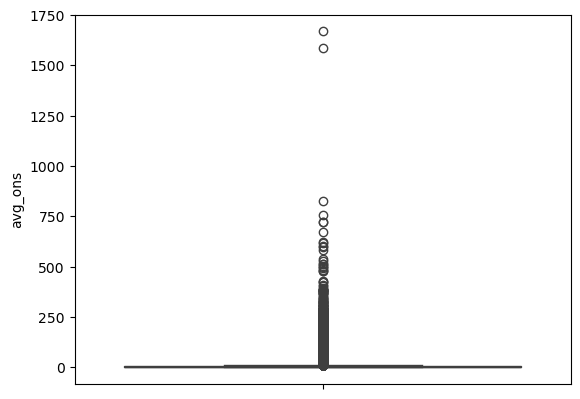

In [664]:
# visualize outliers in avg_ons with a boxplot
sns.boxplot(data=prt_df['avg_ons'])

In [666]:
# look at the top values in that column to see if they differ from the rest
prt_df.sort_values('avg_ons', ascending=False).head(20)

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,datekey,time_period,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs
63941,7280,P03090,SMITHFIELD ST AT SIXTH AVE,Outbound,"39, 40, 44, P1, P2, P68, P71",40.4417,-79.9976,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,201909,Pre-pandemic,P1,Weekday,33376.0,10530.0,20,1668.8000,526.5000
63958,7280,P03090,SMITHFIELD ST AT SIXTH AVE,Outbound,"39, 40, 44, P1, P2, P68, P71",40.4417,-79.9976,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,202001,Pre-pandemic,P1,Weekday,34887.0,10995.0,22,1585.7730,499.7727
64290,44,P03360,STANWIX ST AT FORBES AVE,Outbound,"36, 38",40.4410,-80.0040,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,38,Weekday,16572.0,5221.0,20,828.6000,261.0500
63975,7280,P03090,SMITHFIELD ST AT SIXTH AVE,Outbound,"39, 40, 44, P1, P2, P68, P71",40.4417,-79.9976,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,202009,Pandemic,P1,Weekday,15839.0,6368.0,21,754.2381,303.2381
63606,2932,P02860,PENN AVE AT 7TH ST,Both,"8, 29, 31, G31",40.4433,-80.0001,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,8,Weekday,14480.0,10235.0,20,724.0000,511.7500
64294,44,P03360,STANWIX ST AT FORBES AVE,Outbound,"36, 38",40.4410,-80.0040,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,38,Weekday,15897.0,4825.0,22,722.5909,219.3182
63614,2932,P02860,PENN AVE AT 7TH ST,Both,"8, 29, 31, G31",40.4433,-80.0001,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,8,Weekday,14737.0,11293.0,22,669.8636,513.3182
62342,1410,P02290,LIBERTY AVE AT 6TH ST,Outbound,"7, 13, 15, 16, 17",40.4420,-80.0016,Bus,City of Pittsburgh,Bus Stop with Non-PAAC Shelter,202001,Pre-pandemic,16,Weekday,13701.0,4768.0,22,622.7727,216.7273
63992,7280,P03090,SMITHFIELD ST AT SIXTH AVE,Outbound,"39, 40, 44, P1, P2, P68, P71",40.4417,-79.9976,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,202104,Pandemic,P1,Weekday,13595.0,5755.0,22,617.9545,261.5909
61161,20182,P00930,7TH ST AT PENN AVE,Both,"13, 16, 17",40.4433,-80.0003,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,16,Weekday,12079.0,19499.0,20,603.9500,974.9500


<Axes: ylabel='avg_offs'>

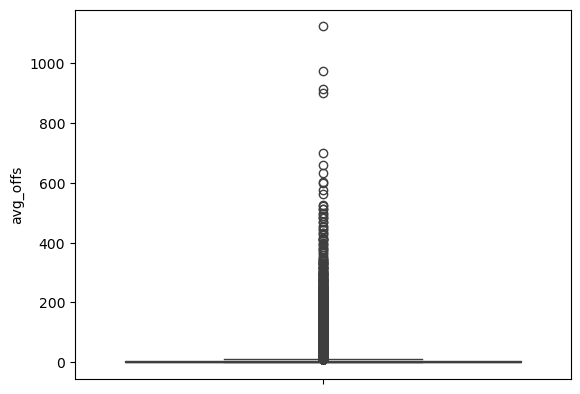

In [668]:
# visualize outliers in the avg_offs column as well
sns.boxplot(data=prt_df['avg_offs'])

In [670]:
# look at the top values in that column to see if they differ from the rest
prt_df.sort_values('avg_offs', ascending=False).head(10)

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,datekey,time_period,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs
62514,7279,P02325,LIBERTY AVE AT 10TH ST NS,Both,"39, 40, 44, P1, P2, P68, P71",40.4438,-79.9949,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,201909,Pre-pandemic,P1,Weekday,9877.0,22487.0,20,493.8500,1124.3500
61161,20182,P00930,7TH ST AT PENN AVE,Both,"13, 16, 17",40.4433,-80.0003,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,16,Weekday,12079.0,19499.0,20,603.9500,974.9500
62531,7279,P02325,LIBERTY AVE AT 10TH ST NS,Both,"39, 40, 44, P1, P2, P68, P71",40.4438,-79.9949,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,202001,Pre-pandemic,P1,Weekday,10642.0,20154.0,22,483.7273,916.0909
61170,20182,P00930,7TH ST AT PENN AVE,Both,"13, 16, 17",40.4433,-80.0003,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,16,Weekday,12772.0,19804.0,22,580.5455,900.1818
104269,16104,E17298,EAST BUSWAY AT WILKINSBURG STATION A,Outbound,"P1, P2, P3",40.4465,-79.8886,Busway,PAAC,Busway Station,201909,Pre-pandemic,P1,Weekday,981.0,14011.0,20,49.0500,700.5500
104274,16104,E17298,EAST BUSWAY AT WILKINSBURG STATION A,Outbound,"P1, P2, P3",40.4465,-79.8886,Busway,PAAC,Busway Station,202001,Pre-pandemic,P1,Weekday,946.0,14554.0,22,43.0000,661.5455
62512,7279,P02325,LIBERTY AVE AT 10TH ST NS,Both,"39, 40, 44, P1, P2, P68, P71",40.4438,-79.9949,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,201909,Pre-pandemic,P1,Sat,403.0,2531.0,4,100.7500,632.7500
62580,20295,P02430,LIBERTY AVE AT GATEWAY #4,Both,"28X, 29, 31, G2, G3, G31, P10",40.4413,-80.0050,Bus,City of Pittsburgh,Bus Stop with Non-PAAC Shelter,201909,Pre-pandemic,G2,Weekday,641.0,12063.0,20,32.0500,603.1500
64505,4832,P03690,WOOD ST AT SIXTH AVE,Inbound,"39, 40, 41, 43, 44, 48, 51, 51L, Y1, Y45, Y46,...",40.4418,-79.9996,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,51,Weekday,5582.0,12013.0,20,279.1000,600.6500
64536,4832,P03690,WOOD ST AT SIXTH AVE,Inbound,"39, 40, 41, 43, 44, 48, 51, 51L, Y1, Y45, Y46,...",40.4418,-79.9996,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,51,Weekday,5811.0,12645.0,22,264.1364,574.7727


In [672]:
# I have chosen only to keep avg_ons and avg_offs entries that are less than 600 because 
# more than 600 riders is unlikely/uncommon and including these values may skew my analysis results
prt_df = prt_df.query("avg_ons < 600 and avg_offs < 600")

<Axes: ylabel='avg_ons'>

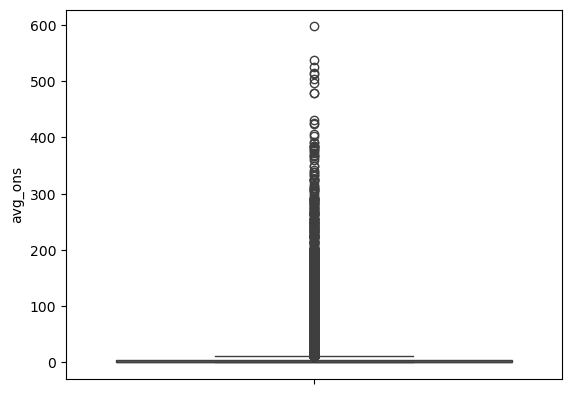

In [674]:
sns.boxplot(data=prt_df['avg_ons'])

In [676]:
# look at the few remaining outliers in the avg_ons column
prt_df.sort_values('avg_ons', ascending=False).head(10)

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,datekey,time_period,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs
62329,1410,P02290,LIBERTY AVE AT 6TH ST,Outbound,"7, 13, 15, 16, 17",40.4420,-80.0016,Bus,City of Pittsburgh,Bus Stop with Non-PAAC Shelter,201909,Pre-pandemic,16,Weekday,11954.0,4051.0,20,597.7000,202.5500
5409,15276,W26140,WEST BUSWAY AT CARNEGIE STATION,Inbound,G2,40.4062,-80.0900,Busway,PAAC,Busway Station,201909,Pre-pandemic,G2,Weekday,10744.0,226.0,20,537.2000,11.3000
63956,7280,P03090,SMITHFIELD ST AT SIXTH AVE,Outbound,"39, 40, 44, P1, P2, P68, P71",40.4417,-79.9976,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,202001,Pre-pandemic,P1,Sat,2104.0,994.0,4,526.0000,248.5000
63126,46,P02550,LIBERTY AVE AT WOOD ST,Both,"2, 28X, 86, 87, 88, 91",40.4425,-79.9994,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,91,Weekday,11311.0,2299.0,22,514.1364,104.5000
63111,46,P02550,LIBERTY AVE AT WOOD ST,Both,"2, 28X, 86, 87, 88, 91",40.4425,-79.9994,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,91,Weekday,10272.0,1976.0,20,513.6000,98.8000
60747,4833,P00740,SIXTH AVE AT SMITHFIELD ST,Both,"41, 43, 48, 51, 51L, Y1, Y45, Y46, Y47, Y49",40.4416,-79.9983,Bus,City of Pittsburgh,Bus Stop with Non-PAAC Shelter,201909,Pre-pandemic,51,Weekday,10080.0,4315.0,20,504.0000,215.7500
60770,4833,P00740,SIXTH AVE AT SMITHFIELD ST,Both,"41, 43, 48, 51, 51L, Y1, Y45, Y46, Y47, Y49",40.4416,-79.9983,Bus,City of Pittsburgh,Bus Stop with Non-PAAC Shelter,202001,Pre-pandemic,51,Weekday,10921.0,5094.0,22,496.4091,231.5455
104249,15880,E17297,EAST BUSWAY AT WILKINSBURG STATION C,Inbound,"P1, P2, P3",40.4469,-79.8886,Busway,PAAC,Busway Station,201909,Pre-pandemic,P1,Weekday,9587.0,1741.0,20,479.3500,87.0500
81752,7117,E19910,FORBES AVE OPP MOREWOOD AVE (CARNEGIE MELLON),Outbound,"67, 69, 61A, 61B, 61C, 61D",40.4445,-79.9423,Bus,City of Pittsburgh,Bus Stop with Non-PAAC Shelter,201909,Pre-pandemic,61D,Weekday,9587.0,3445.0,20,479.3500,172.2500
104251,15880,E17297,EAST BUSWAY AT WILKINSBURG STATION C,Inbound,"P1, P2, P3",40.4469,-79.8886,Busway,PAAC,Busway Station,201909,Pre-pandemic,P3,Weekday,8621.0,607.0,20,431.0500,30.3500


In [678]:
# drop some outliers that may skew future results
prt_df.drop(index=[62329,5409,63956,63126,63111,60747,60770,104249,81752], inplace=True)

<Axes: ylabel='avg_ons'>

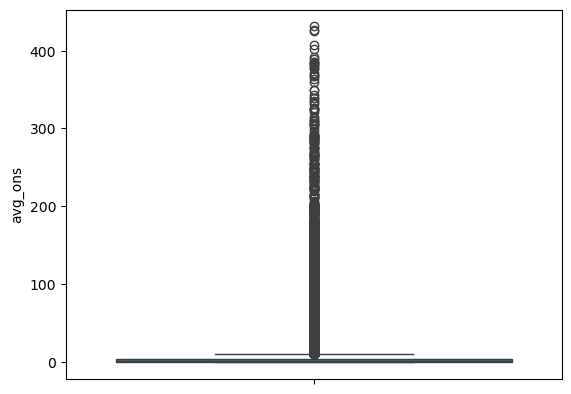

In [680]:
# final visualization to make sure all unrealistic outlier points are gone
sns.boxplot(data=prt_df['avg_ons'])

<Axes: ylabel='avg_offs'>

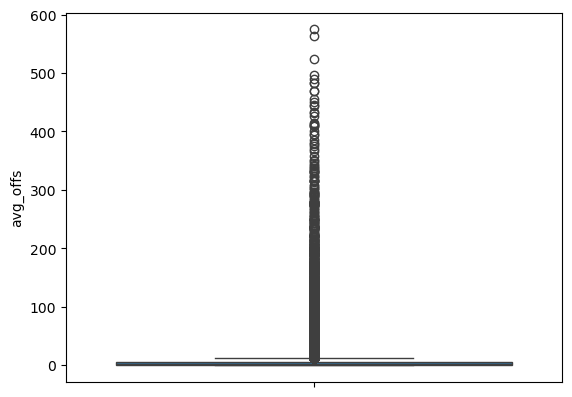

In [682]:
# one more visualization to check for any more outliers
sns.boxplot(data=prt_df['avg_offs'])

In [684]:
# look at the top few outliers shown
prt_df.sort_values('avg_offs', ascending=False).head()

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,datekey,time_period,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs
64536,4832,P03690,WOOD ST AT SIXTH AVE,Inbound,"39, 40, 41, 43, 44, 48, 51, 51L, Y1, Y45, Y46,...",40.4418,-79.9996,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,51,Weekday,5811.0,12645.0,22,264.1364,574.7727
64630,4831,P03695,WOOD ST BTW FORBES AVE & FIFTH AVE,Inbound,"39, 40, 41, 43, 44, 48, 51, 51L, Y1, Y45, Y46,...",40.4403,-80.0006,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,51,Weekday,3857.0,11284.0,20,192.8500,564.2000
62529,7279,P02325,LIBERTY AVE AT 10TH ST NS,Both,"39, 40, 44, P1, P2, P68, P71",40.4438,-79.9949,Bus,Envision Downtown,Bus Stop with Non-PAAC Shelter,202001,Pre-pandemic,P1,Sat,388.0,2096.0,4,97.0000,524.0000
64661,4831,P03695,WOOD ST BTW FORBES AVE & FIFTH AVE,Inbound,"39, 40, 41, 43, 44, 48, 51, 51L, Y1, Y45, Y46,...",40.4403,-80.0006,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,51,Weekday,3844.0,10917.0,22,174.7273,496.2273
61158,20182,P00930,7TH ST AT PENN AVE,Both,"13, 16, 17",40.4433,-80.0003,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,13,Weekday,6986.0,9807.0,20,349.3000,490.3500


In [686]:
# drop the observations that differ too greatly from others 
prt_df.drop(index=[64536,64630,62529], inplace=True)

<Axes: ylabel='avg_offs'>

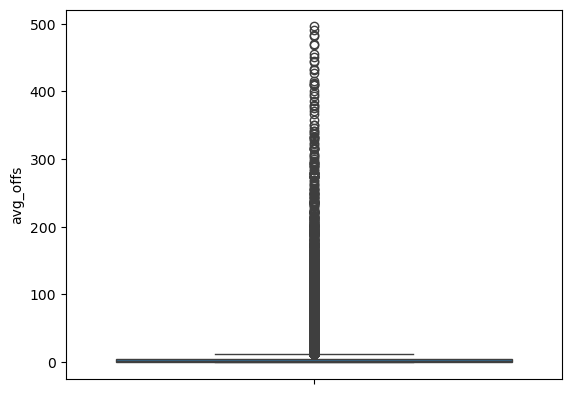

In [688]:
# final visualization to make sure all unrealistic outlier points are gone
sns.boxplot(data=prt_df['avg_offs'])

---

**Create a column for the average amount of riders using a specific stop**

In [692]:
# find the average ridership by calculating the mean of the avg number of people getting on
# and the avg number of people getting off at a specific stop
prt_df['avg_riders'] = prt_df[['avg_ons', 'avg_offs']].mean(axis=1)
prt_df.head()

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,datekey,time_period,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs,avg_riders
0,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Sat,12.0,0.0,4,3.000000,0.00,1.500000
1,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Sun,14.0,0.0,6,2.333333,0.00,1.166667
2,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,69,Weekday,64.0,1.0,20,3.200000,0.05,1.625000
3,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,201909,Pre-pandemic,P69,Weekday,39.0,0.0,20,1.950000,0.00,0.975000
4,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,202001,Pre-pandemic,69,Sat,11.0,0.0,4,2.750000,0.00,1.375000


---

**Generate stop usage visualization**

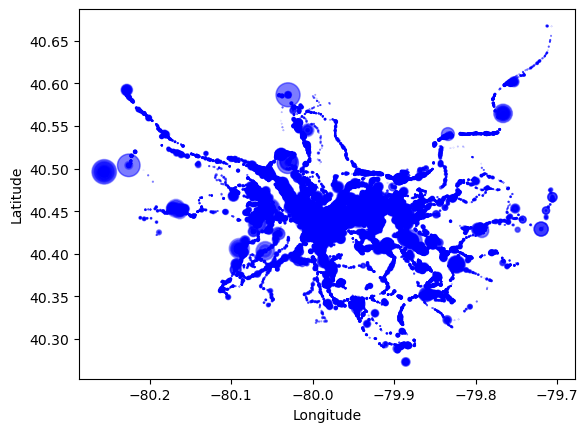

In [696]:
# create a scatterplot of the coordinates of all stops
# make the size of the point (circle) proportional to the average number of riders using that stop
plt.scatter(prt_df['longitude'], prt_df['latitude'], s=prt_df['avg_riders'], c='blue', alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

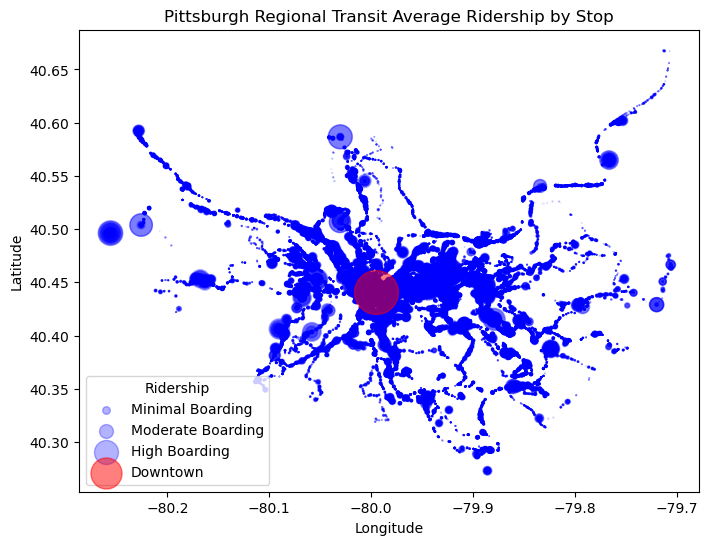

In [698]:
# add downtown area to map to represent an urban area where stops are 

# coordinates for downtown Pittsburgh (approx.)
downtown = (-79.995, 40.441)  # (longitude, latitude)

fig, ax = plt.subplots(figsize=(8,6))

# scatterplot of stop usage generated in previous code segment
stop_usage_scatter = ax.scatter(prt_df['longitude'], prt_df['latitude'], s=prt_df['avg_riders'], c='blue', alpha=0.3)

# add a large dot to show the area where downtown is 
ax.scatter(downtown[0], downtown[1], s=1000, c='red', alpha=0.5)

# make a legend with sizes for different amounts of boarding
legend_sizes = [30, 100, 300]
legend_labels = ["Minimal Boarding", "Moderate Boarding", "High Boarding"]

# add legend markers that will appear as different sizes on figure
legend_marker_sizes = [plt.scatter([], [], s=size, c='blue', alpha=0.3) for size in legend_sizes]

# complete the legend and include the downtown area label
ax.legend(legend_marker_sizes + [plt.scatter([], [], s=500, c='red', alpha=0.5)],  
          legend_labels + ["Downtown"], loc="lower left", title="Ridership")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pittsburgh Regional Transit Average Ridership by Stop")
plt.show()